<div style="text-align: right"> Complete Video File </div> 

## Examples of using `.groupby` on pandas DataFrame data with `bar` and `pie` charts

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('seaborn-colorblind')

path = 'titanic.csv'
raw=pd.read_csv(path)

# taking a subset of the data.  We could now make simple scatter plots of one column vs another as shown previously
data=raw.loc[:,['Survived', 'Pclass','Sex','Age','Fare']]
data.head(8)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
5,0,3,male,NaN,8.4583
6,0,1,male,54.0,51.8625
7,0,3,male,2.0,21.0750


Basic format for finding average:  
By **one** column:      `data.groupby().mean()`  
By **two** columns:     `data.groupby().mean().unstack()`  
By ***three*** columns: `data.groupby().mean().unstack().unstack()`  
etc...

Basic format for counting numbers:  
By **one** column:      `data.groupby().count()`  
By **two** columns:     `data.groupby().count().unstack()`  
By ***three*** columns: `data.groupby().count().unstack().unstack()`  
etc...

1. What is the average ticket price paid by those that died vs survived? Present a bar graph.  

In [3]:
data.groupby('Survived').mean()

,Pclass,Age,Fare
Survived,,,
0,2.531876,30.626179,22.117887
1,1.950292,28.343690,48.395408


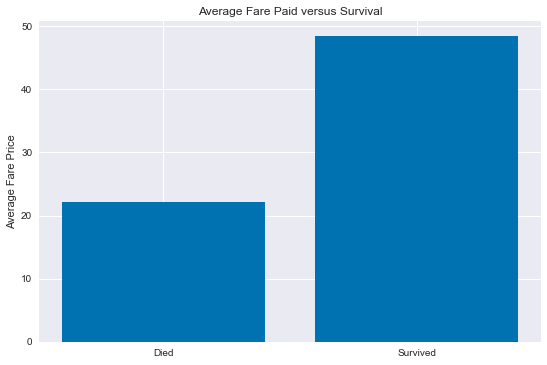

In [40]:
dataforbar=data.groupby('Survived').mean().loc[:,'Fare']

labels = ['Died','Survived']

fig1, ax1 = plt.subplots()
ax1.bar(x=labels, height=dataforbar)
ax1.set_ylabel('Average Fare Price')
ax1.set_title('Average Fare Paid versus Survival')

plt.show()

2. What is the average age of male and female passengers in 1st, 2nd, and 3rd class? Present a grouped bar chart. 

In [26]:
data.groupby(['Sex','Pclass']).mean().unstack().loc[:,'Age']

Pclass,1,2,3
Sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


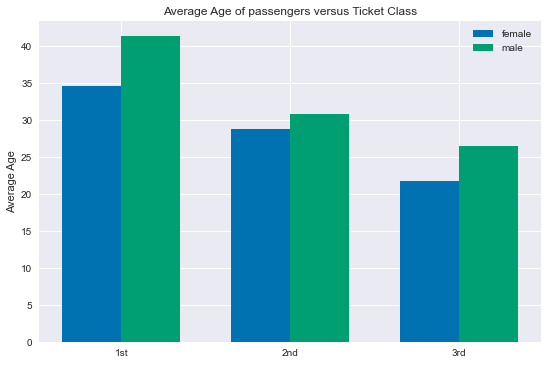

In [39]:
dataforbar=data.groupby(['Sex','Pclass']).mean().unstack().loc[:,'Age']

labels = ['1st','2nd','3rd']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig1, ax1 = plt.subplots()
ax1.bar(x-width/2, dataforbar.loc['female'], label='female',width=width)
ax1.bar(x+width/2, dataforbar.loc['male'], label='male',width=width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Average Age')
ax1.set_title('Average Age of passengers versus Ticket Class')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()

plt.show()

What is the number of male and female passengers vs ticket class that died vs survived? Present a grouped bar chart.  

In [45]:
data.groupby(['Survived','Sex','Pclass']).count().unstack().unstack().loc[:,'Fare']

Pclass        1           2           3     
Sex      female male female male female male
Survived                                    
0             3   77      6   91     72  300
1            91   45     70   17     72   47

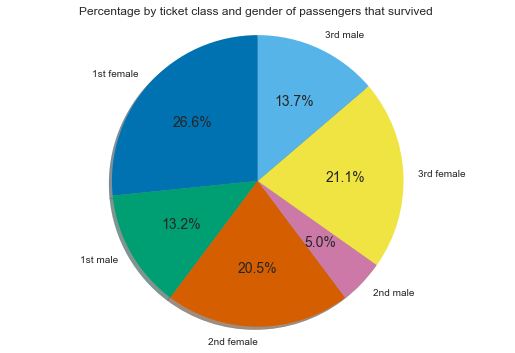

In [49]:
dataforpie=data.groupby(['Survived','Sex','Pclass']).count().unstack().unstack().loc[:,'Fare']

labels = ['1st female','1st male','2nd female','2nd male','3rd female','3rd male']

fig1, ax1 = plt.subplots()
ax1.pie(dataforpie.loc[1], labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_title('Percentage by ticket class and gender of passengers that survived ')
ax1.axis('equal')

plt.show()